In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [123]:
df = pd.read_json('../../src/data/combined_onehot.json')

In [124]:
from src.mymods import correlation_info

['SqFtTotLiving']

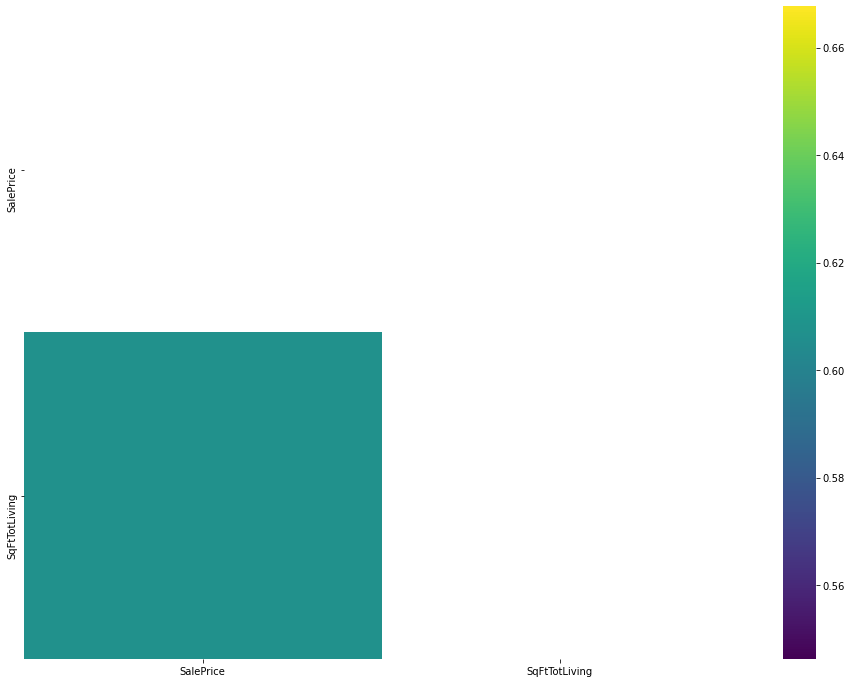

In [125]:
top_corr, graph = correlation_info(df, 'SalePrice',.5)
top_corr

In [79]:
from src.mymods import model_summary

In [80]:
summary, first_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                          1.448e+05
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        15:53:27   Log-Likelihood:                     -3.6678e+05
No. Observations:               25903   AIC:                                  7.336e+05
Df Residuals:                   25902   BIC:                                  7.336e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   343.2993      0.902    380.478      0.000     341.531     345.068
==============================================================================
Omnibus:                     5991.342   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25298.380
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       7.328   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

In [68]:
rainbow_statistic, rainbow_p_value = linear_rainbow(first_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.002177053358847
Rainbow p-value: 0.450760764059331


### Normality

jarque_bera: 25298.37972469803
jarque_bera: 0.0


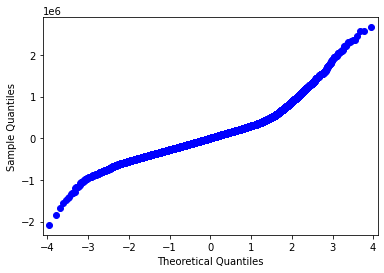

In [100]:
jarque_bera = list(sms.jarque_bera(first_model.resid))[0]
Prob_JB =list(sms.jarque_bera(first_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

first_model_resids = first_model.resid
sm.qqplot(first_model_resids);

'''
The JB score has a low p-value means that the current model violates the
normality assumption. 
That supports the qq visual with the crooked tail.
'''

### Homoscadasticity

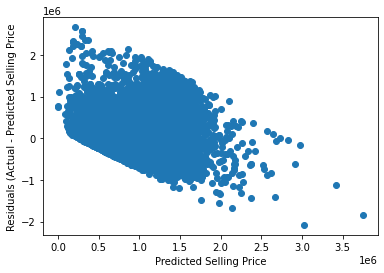

In [96]:
y_hat = first_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, first_model_resids);

# Second Model

['SqFtTotLiving', 'SqFtOpenPorch', 'FinBasementGrade']

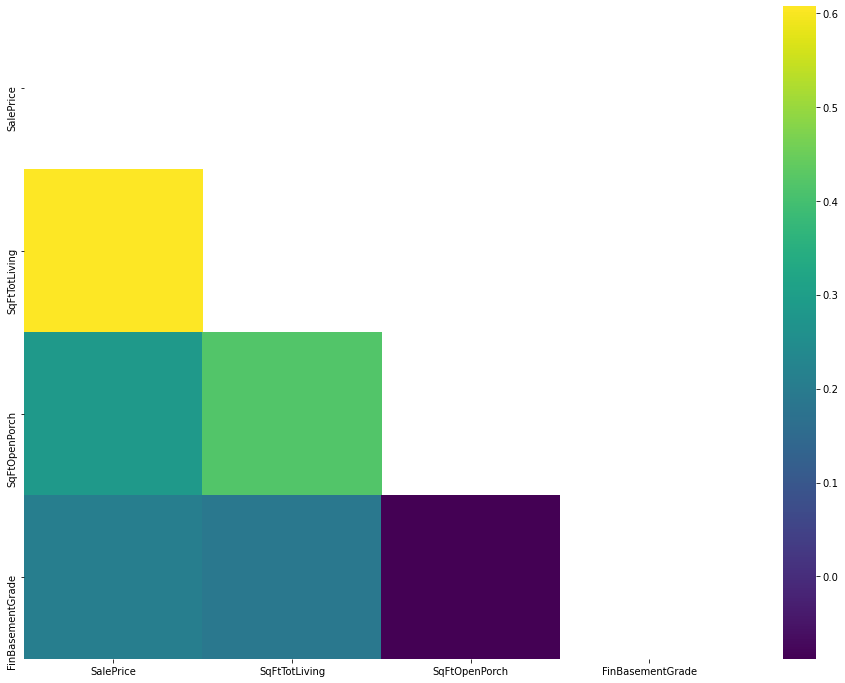

In [83]:
top_corr, graph = correlation_info(df, 'SalePrice',.2)
top_corr

In [84]:
summary, second_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                          4.953e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        16:36:58   Log-Likelihood:                     -3.6649e+05
No. Observations:               25903   AIC:                                  7.330e+05
Df Residuals:                   25900   BIC:                                  7.330e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SqFtTotLiving      320.1277      1.456    219.861      0.000     317.274     322.982
SqFtOpenPorch      136.3705     19.475      7.002      0.000      98.198     174.542
FinBasementGrade  1.448e+04    601.438     24.083      0.000    1.33e+04    1.57e+04
==============================================================================
Omnibus:                     6288.876   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27985.569
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                       7.569   Cond. No.                         675.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

In [89]:
rainbow_statistic, rainbow_p_value = linear_rainbow(second_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0051454366610355
Rainbow p-value: 0.38513834754708215


### Normality 

In [ ]:
jarque_bera = list(sms.jarque_bera(second_model.resid))[0]
Prob_JB =list(sms.jarque_bera(second_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

second_model_resids = second_model.resid
sm.qqplot(Second_model_resids);

### Homoscadasticity

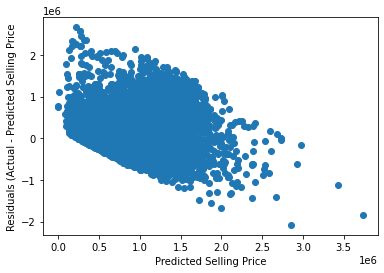

In [101]:
y_hat = second_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, test_model_resids);

### Independence

In [102]:
rows = df[top_corr].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(top_corr))]
vif_df["feature"] = top_corr

vif_df

,VIF,feature
0,2.662698,SqFtTotLiving
1,1.719851,SqFtOpenPorch
2,1.747881,FinBasementGrade


# Third Model

['SqFtTotLiving',
 'SqFtOpenPorch',
 'FinBasementGrade',
 'WfntLocation_6.0',
 'WfntLocation_7.0',
 'WfntFootage',
 'WfntLocation_3.0',
 'WfntLocation_8.0',
 'WfntLocation_5.0',
 'WfntLocation_9.0',
 'WfntLocation_4.0']

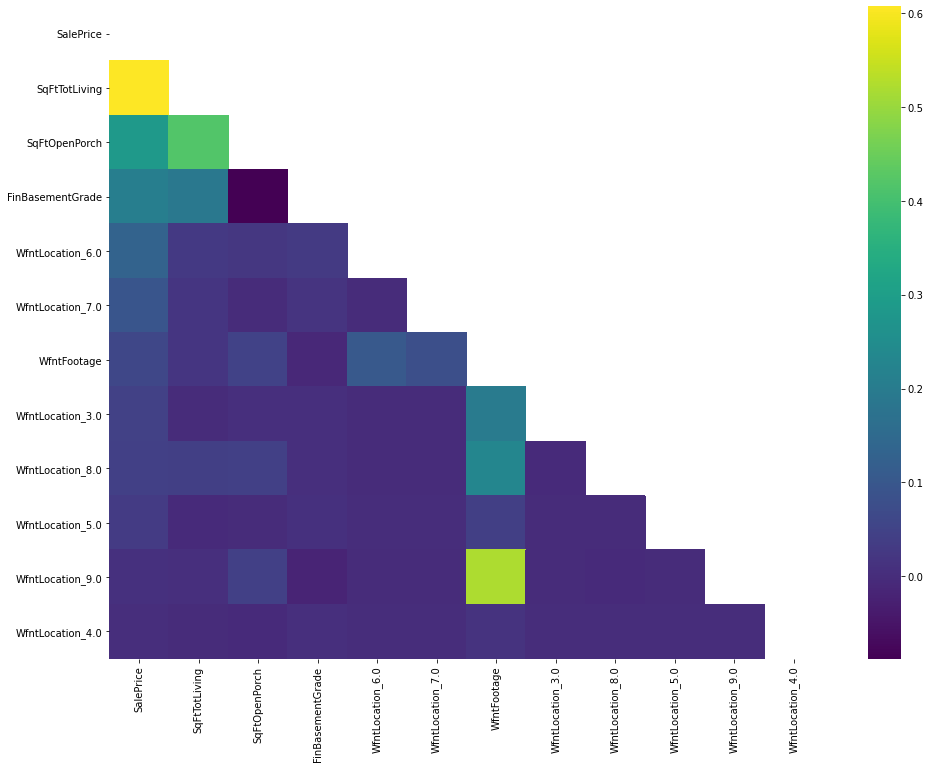

In [126]:
top_corr, graph = correlation_info(df, 'SalePrice',.00)
top_corr

In [127]:
summary, third_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                          1.409e+04
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:38:55   Log-Likelihood:                     -3.6602e+05
No. Observations:               25903   AIC:                                  7.321e+05
Df Residuals:                   25892   BIC:                                  7.322e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
SqFtTotLiving      318.8281      1.432    222.699      0.000     316.022     321.634
SqFtOpenPorch      125.4148     19.159      6.546      0.000      87.862     162.967
FinBasementGrade  1.392e+04    591.080     23.551      0.000    1.28e+04    1.51e+04
WfntLocation_6.0  9.998e+05   4.65e+04     21.505      0.000    9.09e+05    1.09e+06
WfntLocation_7.0  1.238e+06   7.46e+04     16.591      0.000    1.09e+06    1.38e+06
WfntFootage        337.1626    122.082      2.762      0.006      97.876     576.449
WfntLocation_3.0  3.564e+05   3.76e+04      9.472      0.000    2.83e+05     4.3e+05
WfntLocation_8.0  9.195e+04   3.16e+04      2.913      0.004    3.01e+04    1.54e+05
WfntLocation_5.0  8.803e+05   1.26e+05      7.013      0.000    6.34e+05    1.13e+06
WfntLocation_9.0 -3077.7470   4.81e+04     -0.064      0.949   -9.74e+04    9.12e+04
WfntLocation_4.0  3.512e+05   3.32e+05      1.059      0.290   -2.99e+05       1e+06
==============================================================================
Omnibus:                     5791.509   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25429.609
Skew:                           1.035   Prob(JB):                         0.00
Kurtosis:                       7.390   Cond. No.                     3.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity

In [128]:
rainbow_statistic, rainbow_p_value = linear_rainbow(third_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0022942204388814
Rainbow p-value: 0.4481392283725075


### Normality 

jarque_bera: 25429.6093881988
jarque_bera: 0.0


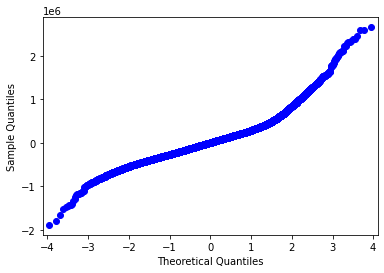

In [129]:
jarque_bera = list(sms.jarque_bera(third_model.resid))[0]
Prob_JB =list(sms.jarque_bera(third_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

third_model_resids = third_model.resid
sm.qqplot(third_model_resids);

### Homoscadasticity

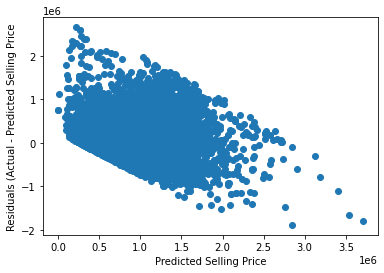

In [130]:
y_hat = third_model.predict()

fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, third_model_resids);

### Independence

In [131]:
rows = df[top_corr].values

In [132]:
rows = df[top_corr].values

vif_df_third = pd.DataFrame()
vif_df_third["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(top_corr))]
vif_df_third["feature"] = top_corr

vif_df_third

,VIF,feature
0,2.668606,SqFtTotLiving
1,1.725518,SqFtOpenPorch
2,1.750090,FinBasementGrade
3,1.022329,WfntLocation_6.0
4,1.012027,WfntLocation_7.0
5,1.638109,WfntFootage
6,1.068626,WfntLocation_3.0
7,1.096155,WfntLocation_8.0
8,1.003131,WfntLocation_5.0
9,1.453172,WfntLocation_9.0
